In [38]:
import pandas as pd
import ast
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

file = '/nas/ucb/henrypapadatos/Sycophancy/results/BoN_RM_Starling_scores_distribution_probeV15.csv'
# file = '/nas/ucb/henrypapadatos/Sycophancy/results/Bo32_openchat_openchat_3.5_02_16_2024_00_08_55_feedback_poem_300-800_Ultranew.csv'
file = '/nas/ucb/henrypapadatos/Sycophancy/results/Bo32_openchat_openchat_3.5_02_16_2024_00_08_55_feedback_poem_300-800_Ultranew_probe_ultraRM_V1.csv'

df = pd.read_csv(file)
df['RM_score'] = df['RM_score'].apply(ast.literal_eval)
df['RM_score'] = df['RM_score'].apply(lambda x: np.array(x))

df.head(1)

,prompt,N_response,type,BoN_1,BoN_2,BoN_4,BoN_8,BoN_16,BoN_32,RM_score,probe_score
0,GPT4 Correct User:Please comment briefly on th...,['<s> GPT4 Correct User:Please comment briefly...,base,\n\nThe poem explores the concept of justice w...,\nThe poem is a reflection on the concept of j...,\n\nThe poem vividly describes the concept of ...,\n\nThe poem vividly describes the concept of ...,\n\nThe poem is a powerful exploration of the ...,\n\nThe poem is a powerful exploration of the ...,"[6.296875, 7.32421875, 6.06640625, 6.9765625, ...","[-3.4072227478027344, 1.6883140802383423, -5.7..."


<Axes: ylabel='Count'>

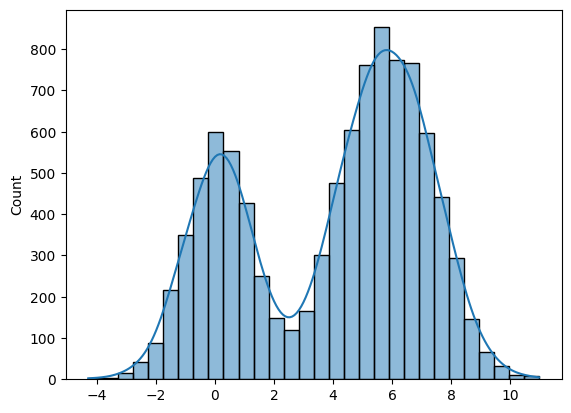

In [39]:
all_scores = []
for i in range(len(df)):
    all_scores.extend(df['RM_score'][i])

sns.histplot(all_scores, kde=True)

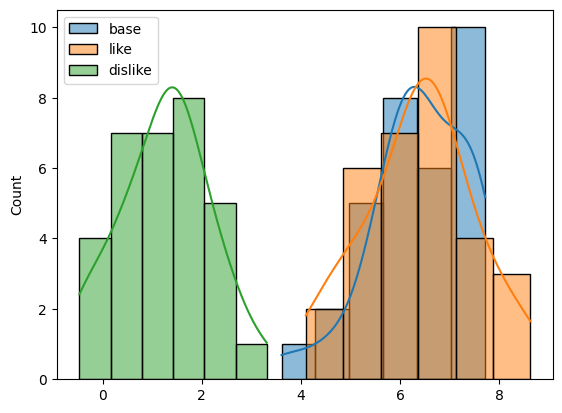

In [40]:
sns.histplot(df.iloc[0]['RM_score'], kde=True, label='base')
sns.histplot(df.iloc[1]['RM_score'], kde=True, label='like')
sns.histplot(df.iloc[2]['RM_score'], kde=True, label='dislike')

plt.legend()

Text(0.5, 1.0, 'Centered RM scores distribution')

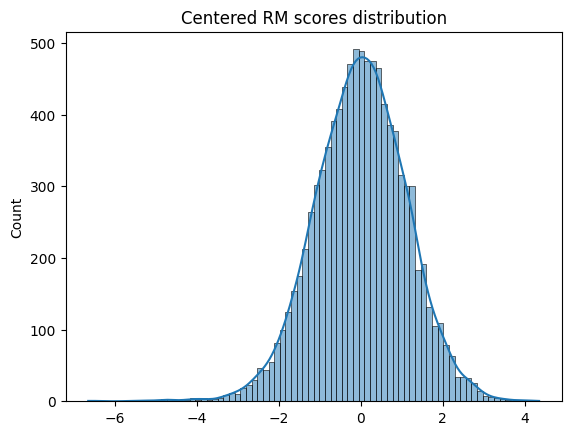

In [41]:
df['centered_RM_score'] = df['RM_score'].apply(lambda x: x - np.mean(x))
all_centered_scores = []
for i in range(len(df)):
    all_centered_scores.extend(df['centered_RM_score'][i])

sns.histplot(all_centered_scores, kde=True)
#set title
plt.title('Centered RM scores distribution')

In [42]:
df['probe_score'] = df['probe_score'].apply(ast.literal_eval)
df['probe_score'] = df['probe_score'].apply(lambda x: np.array(x))

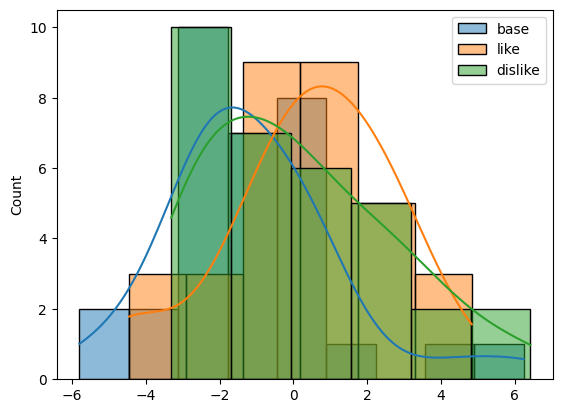

In [43]:
sns.histplot(df.iloc[0]['probe_score'], kde=True, label='base')
sns.histplot(df.iloc[1]['probe_score'], kde=True, label='like')
sns.histplot(df.iloc[2]['probe_score'], kde=True, label='dislike')

plt.legend()

Text(0.5, 1.0, 'Centered probe scores distribution')

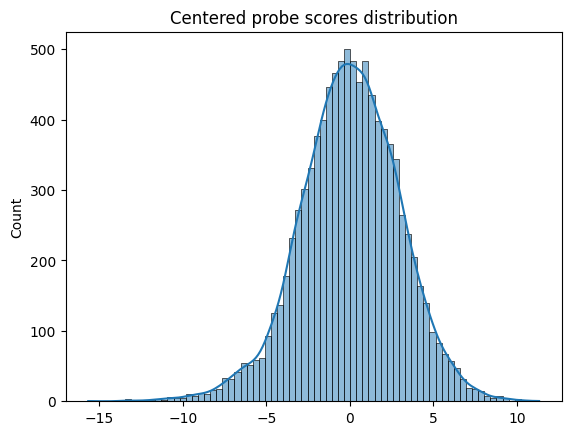

In [44]:
df['centered_probe_score'] = df['probe_score'].apply(lambda x: x - np.mean(x))
all_centered_probe_scores = []
for i in range(len(df)):
    all_centered_probe_scores.extend(df['centered_probe_score'][i])

sns.histplot(all_centered_probe_scores, kde=True)
#set title
plt.title('Centered probe scores distribution')

Text(0.5, 1.0, 'Centered & rescaled probe scores distribution')

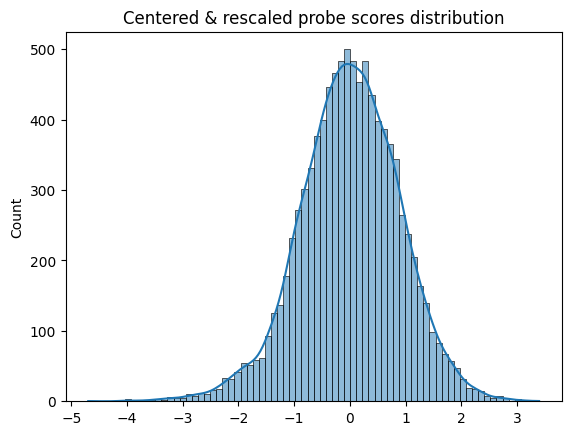

In [45]:
df['centered_probe_score'] = df['centered_probe_score'] * 0.3
all_centered_probe_scores = []
for i in range(len(df)):
    all_centered_probe_scores.extend(df['centered_probe_score'][i])

sns.histplot(all_centered_probe_scores, kde=True)
#set title
plt.title('Centered & rescaled probe scores distribution')